In [97]:
import glob
import os

folderpath = r"C:\Users\jarjarbinks\code\k-exp\kexp\results\*\*\*"
list_of_files = glob.glob(folderpath) # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getmtime)
print(latest_file)

C:\Users\jarjarbinks\code\k-exp\kexp\results\2023-03-08\16\000000366-TOF_MOT.h5


In [98]:
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

f = h5py.File(latest_file)
data = f['datasets']
images = data['img_all']

In [99]:
def compute_OD(images):
    '''From a list of images (length 3*n, where n is the number of runs), computes OD.'''
    idx = 0
    ODs = []

    img_atoms = images[0::3]
    img_light = images[1::3]
    img_dark = images[2::3]

    for idx in range(len(img_atoms)):
        atoms = img_atoms[idx]
        light = img_light[idx]
        dark = img_dark[idx]

        atoms_only = atoms - dark
        light_only = light - dark

        atoms_only[atoms_only < 0] = 0
        light_only[light_only < 0] = 0

        It_over_I0 = np.divide(atoms_only, light_only, 
                       out=np.zeros(atoms_only.shape, dtype=float), 
                       where= light_only!=0)
        
        OD = -np.log10(It_over_I0,
                       out=np.zeros(atoms_only.shape, dtype=float), 
                       where= It_over_I0!=0)
        
        OD[OD<0] = 0

        ODs.append(OD)

    return ODs

ODs = compute_OD(images)

In [100]:
plt.set_cmap("magma")

<Figure size 640x480 with 0 Axes>

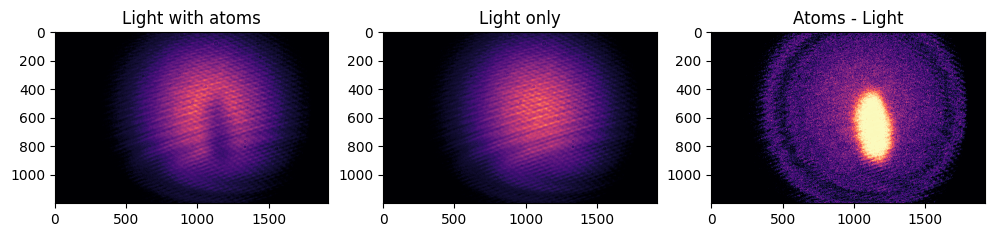

In [101]:
plt.figure(figsize=(12,3))
idx = 0
img0 = data['img_atoms'][idx]
img1 = data['img_light'][idx]
img2 = data['img_dark'][idx]
plt.subplot(1,3,1)
plt.imshow(img0)
plt.title("Light with atoms")
plt.subplot(1,3,2)
plt.imshow(img1)
plt.title("Light only")
plt.subplot(1,3,3)
plt.imshow(img0-img1)
plt.title("Atoms - Light")
plt.show()

In [102]:
roix = [850,1450]
roiy = [250,1200]
ODcrop = []
for od in ODs:
    ODcrop.append( od[ roiy[0]:roiy[1], roix[0]:roix[1] ] )

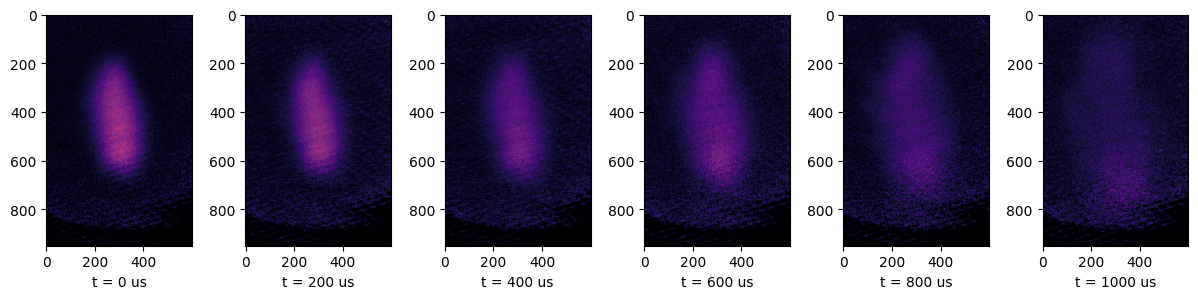

In [103]:
fig, ax = plt.subplots(1,len(ODcrop))
t_tof = data['t_tof_list_s']
for i in range(len(ODcrop)):
    ax[i].imshow(ODcrop[i])
    ax[i].set_xlabel(f"t = {t_tof[i]*1.e6:1.0f} us")
fig.set_figheight(3)
fig.set_figwidth(15)
plt.show() 

In [104]:
np.shape(ODcrop[0])

(950, 600)

In [105]:
np.shape(ODcrop[0])

(950, 600)

In [106]:
summedODy = []
summedODx = []
for od in ODcrop:
    summedODy.append( np.sum(od,1) )
    summedODx.append( np.sum(od,0) )

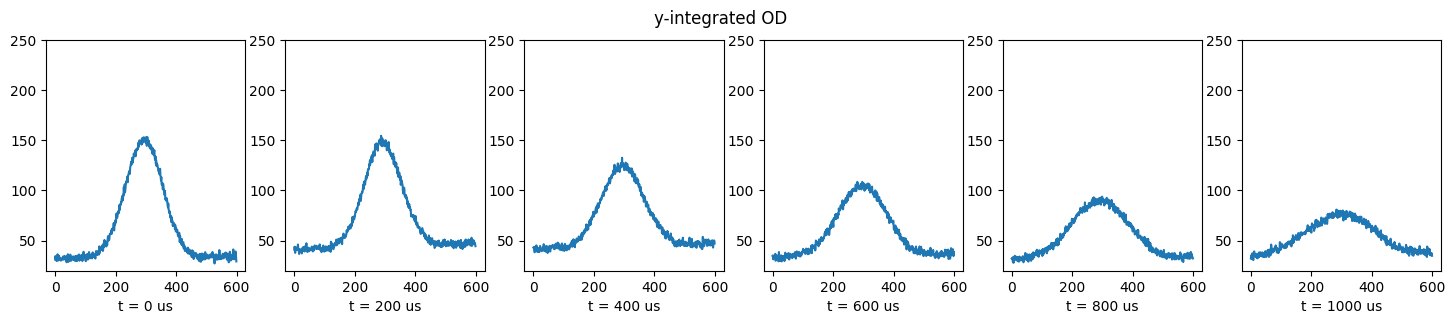

In [107]:
fig, ax = plt.subplots(1,len(summedODy))
t_tof = data['t_tof_list_s']
for i in range(len(summedODy)):
    ax[i].plot(summedODx[i])
    ax[i].set_xlabel(f"t = {t_tof[i]*1.e6:1.0f} us")
    ax[i].set_ylim(20,250)
fig.set_figheight(3)
fig.set_figwidth(18)
fig.suptitle("y-integrated OD")
plt.show() 

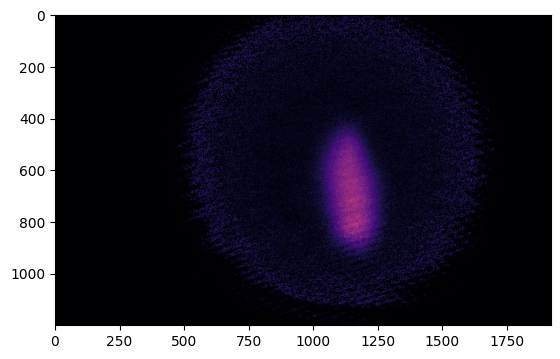

In [108]:
images[0]
plt.figure()
plt.imshow(ODs[0])